In [1]:
# Install dependencies
!pip install numpy pandas matplotlib seaborn scikit-learn pandas-profiling imblearn

In [2]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced

# add some magic
%matplotlib inline

# Adjust some limits
pd.options.display.max_columns=500
pd.options.display.max_rows=500
pd.options.display.width=1000

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.21.3)


In [4]:
# Load the dataset
print('Loading data...')
print('Train Identity')
train_identity_df = pd.read_csv('train_identity.csv')
# train_identity_df.set_index('TransactionID', inplace=True)
display(train_identity_df.shape)
print('Train Transaction')
train_transaction_df = pd.read_csv('train_transaction.csv')
# train_transaction_df.set_index('TransactionID', inplace=True)
display(train_transaction_df.shape)
print('OK!')

Loading data...
Train Identity


(144233, 41)

Train Transaction


(546898, 394)

OK!


In [5]:
train_identity_df.describe()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,74926.000000,140978.000000,127320.000000,80044.000000,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,-0.301124,99.745325,48.053071,-344.507146,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,2.789446,1.127602,11.774858,93.695502,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,-100.000000,90.000000,10.000000,-660.000000,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,0.000000,100.000000,49.000000,-360.000000,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,0.000000,100.000000,52.000000,-300.000000,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,0.000000,100.000000,52.000000,-300.000000,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,0.000000,100.000000,64.000000,720.000000,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [6]:
train_identity_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [7]:
train_identity_df.count()

TransactionID    144233
id_01            144233
id_02            140872
id_03             66324
id_04             66324
id_05            136865
id_06            136865
id_07              5155
id_08              5155
id_09             74926
id_10             74926
id_11            140978
id_12            144233
id_13            127320
id_14             80044
id_15            140985
id_16            129340
id_17            139369
id_18             45113
id_19            139318
id_20            139261
id_21              5159
id_22              5169
id_23              5169
id_24              4747
id_25              5132
id_26              5163
id_27              5169
id_28            140978
id_29            140978
id_30             77565
id_31            140282
id_32             77586
id_33             73289
id_34             77805
id_35            140985
id_36            140985
id_37            140985
id_38            140985
DeviceType       140810
DeviceInfo       118666
dtype: int64

In [8]:
train_transaction_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.468980e+05,546898.000000,5.468980e+05,546898.000000,546898.000000,538436.000000,545334.000000,542777.000000,485748.000000,485748.000000,218657.000000,35519.000000,546898.000000,546898.000000,546898.000000,546898.000000,546898.000000,546898.000000,546898.000000,546898.000000,546898.000000,546898.000000,546898.000000,546898.000000,546898.000000,546898.000000,545670.000000,284037.000000,300192.000000,388474.000000,257283.000000,67220.000000,35043.000000,69539.000000,69539.000000,474087.000000,279797.000000,60179.000000,56462.000000,57137.000000,461930.000000,279797.000000,279797.000000,279797.000000,279797.000000,279797.000000,279797.000000,279797.000000,279797.000000,279797.000000,279797.000000,279797.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.

In [9]:
train_transaction_df.count()

TransactionID     546898
isFraud           546898
TransactionDT     546898
TransactionAmt    546898
ProductCD         546898
card1             546898
card2             538436
card3             545334
card4             545322
card5             542777
card6             545328
addr1             485748
addr2             485748
dist1             218657
dist2              35519
P_emaildomain     460401
R_emaildomain     128308
C1                546898
C2                546898
C3                546898
C4                546898
C5                546898
C6                546898
C7                546898
C8                546898
C9                546898
C10               546898
C11               546898
C12               546898
C13               546898
C14               546898
D1                545670
D2                284037
D3                300192
D4                388474
D5                257283
D6                 67220
D7                 35043
D8                 69539
D9                 69539


In [10]:
train_transaction_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [11]:
# Merge identity and transaction dataframes
# Option 1: left join
##train_full_df = pd.merge(train_identity_df, train_transaction_df, on='TransactionID', how='left')
# Option 2: Outer join
train_full_df = train_transaction_df.merge(train_identity_df, on='TransactionID', how='outer')
train_full_df.shape

(556061, 434)

In [12]:
# Clear RAM 
train_identity_df = None
train_transaction_df = None

# Drop not relevant data columns
# drop all columns with less than 75.000 values
# train_df.dropna(axis='columns', thresh=75000, inplace=True)
# We need to drop the same columns in test dataset, so, will use another method to list columns
null_percent = train_full_df.isnull().sum()/train_full_df.shape[0]*100
cols_to_drop = np.array(null_percent[null_percent > 50].index)
cols_to_drop

array(['dist1', 'dist2', 'R_emaildomain', 'D5', 'D6', 'D7', 'D8', 'D9',
       'D12', 'D13', 'D14', 'M5', 'M7', 'M8', 'M9', 'V138', 'V139',
       'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147',
       'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155',
       'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163',
       'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171',
       'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179',
       'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187',
       'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195',
       'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203',
       'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211',
       'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219',
       'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227',
       'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235',
       '

In [13]:
# Drop Columns (cols_to_drop) from train dataframe
train_full_df = train_full_df.drop(cols_to_drop, axis=1)
train_full_df.shape

(556061, 220)

In [14]:
train_full_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,5.560610e+05,546898.000000,5.468980e+05,546898.000000,546898.000000,538436.000000,545334.000000,542777.000000,485748.000000,485748.000000,546898.000000,546898.000000,546898.000000,546898.000000,546898.000000,546898.000000,546898.000000,546898.000000,546898.000000,546898.000000,546898.000000,546898.000000,546898.000000,546898.000000,545670.000000,284037.000000,300192.000000,388474.000000,474087.000000,279797.000000,461930.000000,279797.000000,279797.000000,279797.000000,279797.000000,279797.000000,279797.000000,279797.000000,279797.000000,279797.000000,279797.000000,279797.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,474040.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,388430.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,473248.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,461884.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546584.000000,546886.000000,546886.000000,545670.000000,545670.000000,545670.000000,546886.000000,546886.000000,546886.000000,546886.000000,545670.000000,545670.000000,546886.000000,546886.000000,546886.000000,546886.000000,546886.000000,546886.000000,545670.000000,546886.000000,546886.000000,546886.000000,545670.000000,545670.000000,546886.000000,546886.000000,546886.000000,546886.000000,546886.000000,546886.000000,546886.000000,546886.000000,546886.000000,546886.000000,546886.000000,545670.000000,545670.000000,545670.000000,546885.000000,546885.000000,546885.000000,546885.000000,546885.000000,546885.000000
mean,3.265293e+06,0.034646,6.755184e+06,134.718293,9881.231401,362.408000,153.227829,199.43

In [15]:
train_full_df.count()

TransactionID     556061
isFraud           546898
TransactionDT     546898
TransactionAmt    546898
ProductCD         546898
card1             546898
card2             538436
card3             545334
card4             545322
card5             542777
card6             545328
addr1             485748
addr2             485748
P_emaildomain     460401
C1                546898
C2                546898
C3                546898
C4                546898
C5                546898
C6                546898
C7                546898
C8                546898
C9                546898
C10               546898
C11               546898
C12               546898
C13               546898
C14               546898
D1                545670
D2                284037
D3                300192
D4                388474
D10               474087
D11               279797
D15               461930
M1                287988
M2                287988
M3                287988
M4                284916
M6                388116


In [0]:
# Get rid of null values
train_full_df.fillna(value=train_full_df.median(), inplace=True)
# this will only fill numerical values, now let's go for categorical data
train_full_df.fillna(value='Other', inplace=True)

In [17]:
# now we should not have more nulls
print('Total Number of nulls =', train_full_df.isnull().sum().sum())

Total Number of nulls = 0


In [18]:
# Explore categorical features
category_cols = [col for col in train_full_df.columns if train_full_df[col].dtype in ['object']]
train_full_df[category_cols].describe()

,ProductCD,card4,card6,P_emaildomain,M1,M2,M3,M4,M6
count,556061,556061,556061,556061,556061,556061,556061,556061,556061
unique,6,5,5,60,3,3,3,4,3
top,W,visa,debit,gmail.com,T,Other,Other,Other,F
freq,405297,356151,407111,211673,287963,268073,268073,271145,210141


In [20]:
print('Training set:')
for col_name in train_full_df.columns:
    if train_full_df[col_name].dtypes == 'object' :
        unique_cat = len(train_full_df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Training set:
Feature 'ProductCD' has 6 categories
Feature 'card4' has 5 categories
Feature 'card6' has 5 categories
Feature 'P_emaildomain' has 60 categories
Feature 'M1' has 3 categories
Feature 'M2' has 3 categories
Feature 'M3' has 3 categories
Feature 'M4' has 4 categories
Feature 'M6' has 3 categories


In [22]:
# In order to correlation matrix calculation work on all columns, we should convert all to numeric values.
# Label Encoding for categorical variables.
for f in train_full_df.columns:
    if train_full_df[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_full_df[f].values))
        train_full_df[f] = lbl.transform(list(train_full_df[f].values))
train_full_df.head(),


(   TransactionID  isFraud  TransactionDT  TransactionAmt  ProductCD    card1  card2  card3  card4  card5  card6  addr1  addr2  P_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12   C13  C14     D1     D2    D3    D4   D10    D11    D15  M1  M2  M3  M4  M6   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  V60  V61  V62  V63  V64  V65  V66  V67  V68  V69  V70  V71  V72  V73  V74  V75  V76  V77  V78  V79  V80  V81  V82  V83  V84  V85  V86  V87  V88  V89  V90  V91  V92  V93  V94  V95   V96   V97  V98   V99  V100  V101  V102  V103  V104  V105  V106  V107  V108  V109  V110  V111  V112  V113  V114  V115  V116  V117  V118  V119  V120  V121  V122  V123  V124  V125  V126    V127   V128  V129   V130   V131  V132    V133   V134  \
 0

In [0]:
# We have A LOT of features, we should drop collinear variables
# Create correlation matrix
corr_matrix = train_full_df.corr().abs()

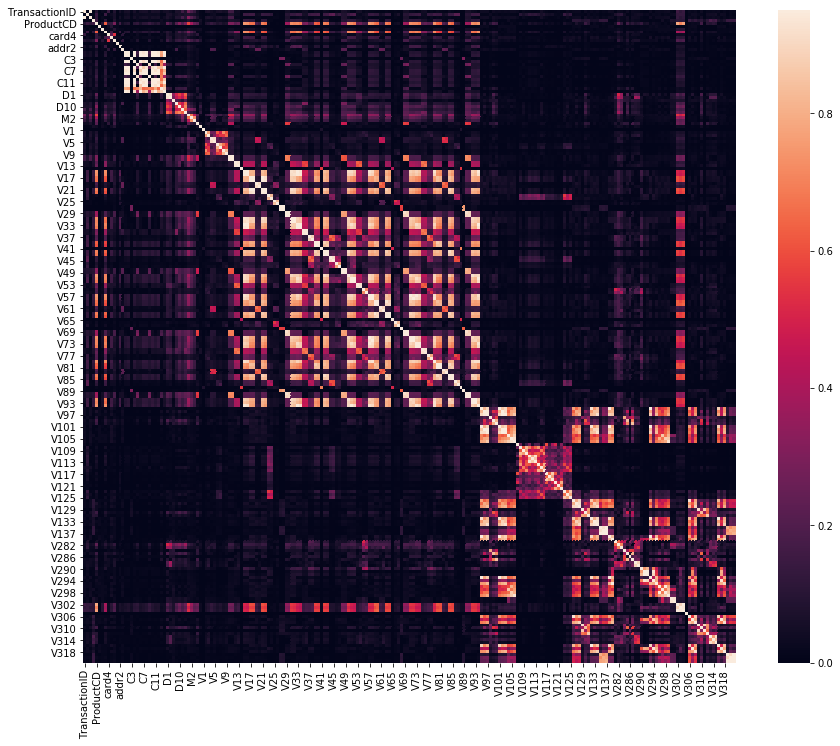

In [24]:
fig = plt.figure(figsize = (15, 12))
sns.heatmap(corr_matrix, vmax = 0.95, square = True)

In [25]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
cols_to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.95)]
cols_to_drop_corr

['TransactionDT',
 'C2',
 'C4',
 'C6',
 'C8',
 'C10',
 'C11',
 'C12',
 'C14',
 'V11',
 'V16',
 'V18',
 'V21',
 'V22',
 'V28',
 'V30',
 'V32',
 'V33',
 'V34',
 'V43',
 'V49',
 'V52',
 'V58',
 'V60',
 'V70',
 'V71',
 'V72',
 'V74',
 'V81',
 'V91',
 'V93',
 'V94',
 'V101',
 'V102',
 'V103',
 'V137',
 'V279',
 'V292',
 'V293',
 'V295',
 'V298',
 'V304',
 'V316',
 'V321']

In [26]:
# Drop Columns (cols_to_drop_corr) from train dataframe
train_full_df = train_full_df.drop(cols_to_drop_corr, axis=1)
train_full_df.shape

(556061, 176)

In [27]:
# Manually drop some more columns from train dataframe
train_full_df = train_full_df.drop(['TransactionID'], axis=1)
train_full_df.shape

(556061, 175)

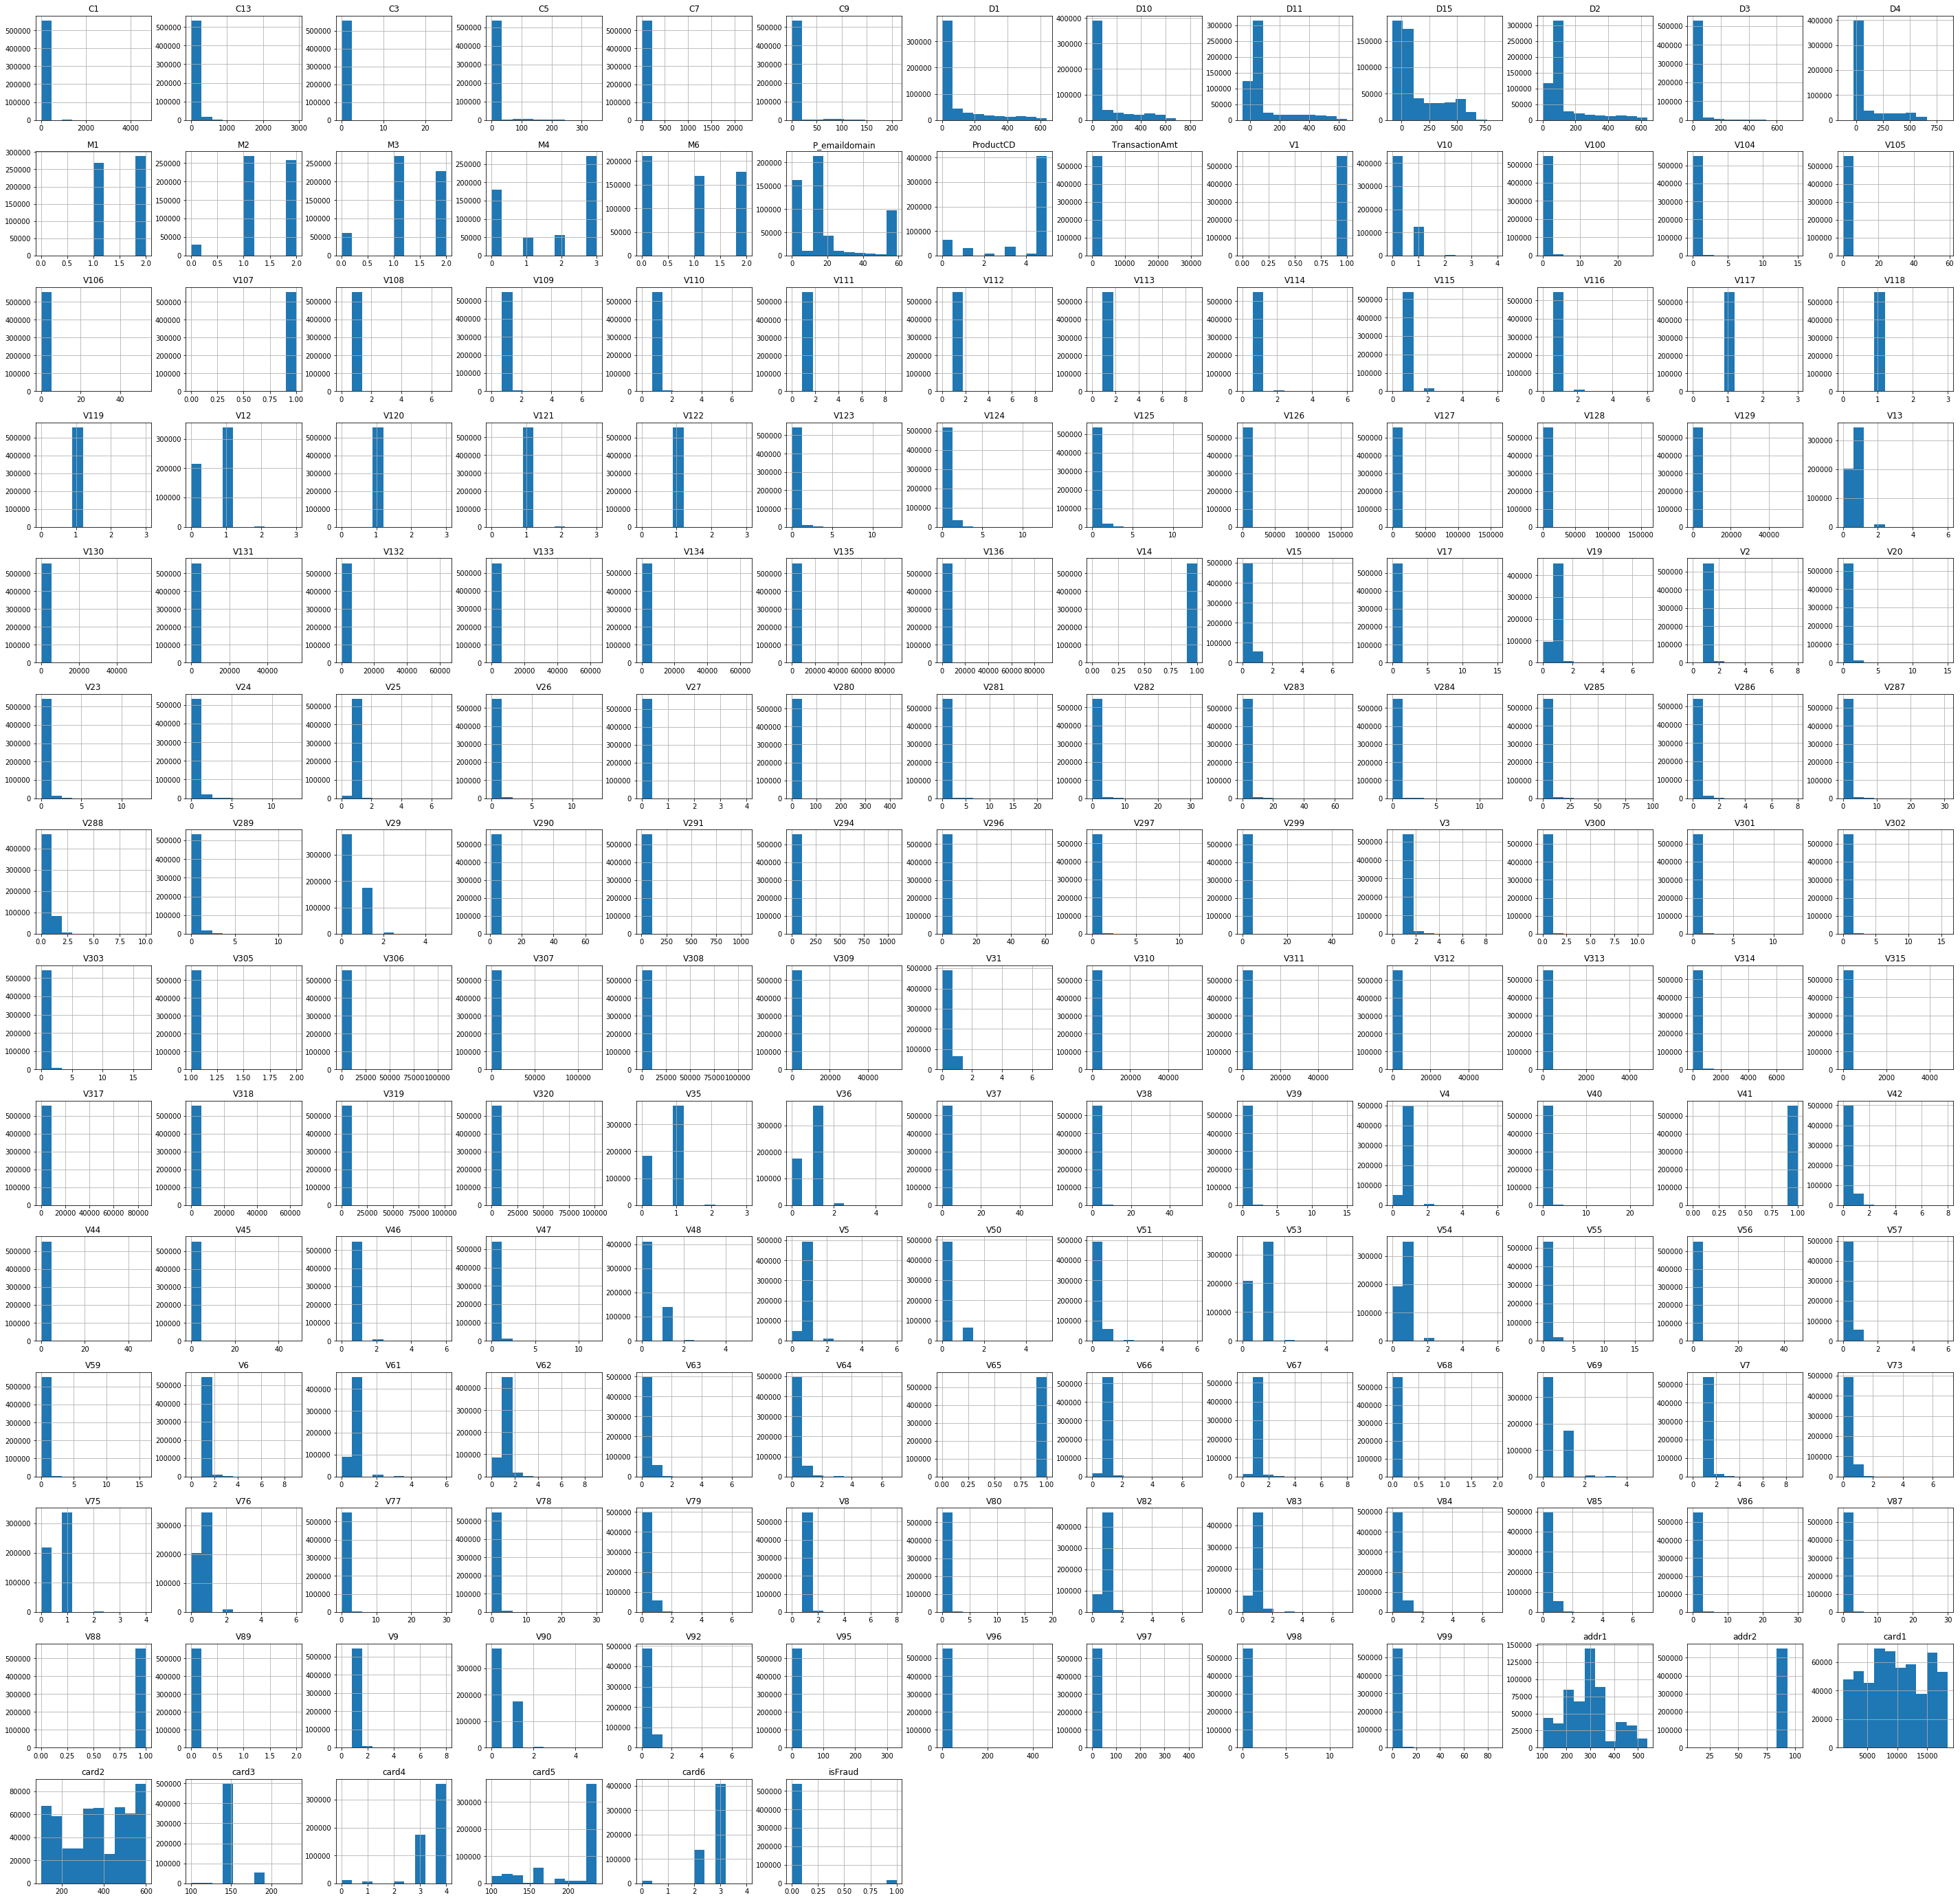

In [28]:
# Check all feature using hist.
train_full_df.hist(figsize=(50,50))
plt.show()

In [29]:
# Let's investigate the target variable
normal_transacation = len(train_full_df[train_full_df["isFraud"]==0])/len(train_full_df)
print("Normal Transaction:",normal_transacation*100,"%")
fraud_transacation= len(train_full_df[train_full_df["isFraud"]==1])/len(train_full_df)
print("Fraud transacation:",fraud_transacation*100, '%')
print("Fraud transacation #:",len(train_full_df[train_full_df["isFraud"]==1]))

Normal Transaction: 96.59246017972848 %
Fraud transacation: 3.4075398202715173 %
Fraud transacation #: 18948


In [30]:
# Dataset is unbalanced, will try undersampling it after capturing all fraud transactions

# Separate the target column, isFraud
y = train_full_df['isFraud']
# Drop the isFraud column from the dataset train_full_df
x = train_full_df.drop(labels='isFraud', axis=1)

print(y.shape, x.shape)
display(y.sample(5))
display(x.sample(5))

(556061,) (556061, 174)


217812    0.0
40042     0.0
529536    0.0
134252    0.0
211573    0.0
Name: isFraud, dtype: float64

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C3,C5,C7,C9,C13,D1,D2,D3,D4,D10,D11,D15,M1,M2,M3,M4,M6,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V12,V13,V14,V15,V17,V19,V20,V23,V24,V25,V26,V27,V29,V31,V35,V36,V37,V38,V39,V40,V41,V42,V44,V45,V46,V47,V48,V50,V51,V53,V54,V55,V56,V57,V59,V61,V62,V63,V64,V65,V66,V67,V68,V69,V73,V75,V76,V77,V78,V79,V80,V82,V83,V84,V85,V86,V87,V88,V89,V90,V92,V95,V96,V97,V98,V99,V100,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V294,V296,V297,V299,V300,V301,V302,V303,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V317,V318,V319,V320
550790,68.758,2,9633.0,361.0,150.0,0,226.0,0,299.0,87.0,0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,98.0,8.0,25.0,14.0,41.0,50.0,1,1,1,3,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
10954,226.000,5,9692.0,174.0,150.0,4,195.0,3,123.0,87.0,17,1.0,0.0,0.0,0.0,1.0,3.0,35.0,35.0,30.0,25.0,0.0,41.0,50.0,1,1,1,0,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,5.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,329.500000,0.000000,0.0,29.000000,0.0,0.0,117.0,146.0,146.0,300.5,0.0,0.000000,0.000000
138982,29.000,5,3277.0,111.0,150.0,4,226.0,3,231.0,87.0,0,2.0,0.0,0.0,0.0,1.0,13.0,206.0,206.0,17.0,25.0,425.0,41.0,425.0,1,1,1,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,117.000000,0.000000,0.0,117.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,178.000000,0.000000,0.0,149.000000,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.000000,0.000000
493526,97.950,5,4806.0,490.0,150.0,4,226.0,3,315.0,87.0,17,5.0,0.0,4.0,0.0,3.0,15.0,158.0,158.0,0.0,336.0,217.0,301.0,336.0,2,2,2,3,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,97.949997,97.949997,97.949997,0.0,0.000000,0.0,0.0,0.0,0.0,97.949997,97.949997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,97.949997,97.949997,97.949997,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.949997,97.949997
497877,57.950,5,18118.0,108.0,150.0,3,117.0,3,205.0,87.0,2,2.0,0.0,2.0,0.0,2.0,9.0,72.0,72.0,8.0,72.0,21.0

In [31]:
# Clear RAM 
train_full_df = None

# Now that we have separated the target variable, let's undersample 
rus = RandomUnderSampler(random_state=555) # we use a random_state to get the same sampled rows over executions
x_rus, y_rus = rus.fit_resample(x, y)

# Check
print(x_rus.shape, y_rus.shape)

(37896, 174) (37896,)


In [32]:
# Check Dataset Balance 
print(f'Total number of Transactions {x_rus.shape[0]}')
print(f'Total Number of Fraudulent Transactions {y_rus.sum()}')
print(f'Exactly {(y_rus.sum()/x_rus.shape[0])*100:0.3f}% of the transactions are Fraudulent')

Total number of Transactions 37896
Total Number of Fraudulent Transactions 18948.0
Exactly 50.000% of the transactions are Fraudulent


In [33]:
# x_rus is a numpy array, recreate the undersampled dataframe 
x_df = pd.DataFrame(data=x_rus,               # values
                    columns=x.columns.values) # 1st row as the column names
x_df.shape

(37896, 174)

In [34]:
x_df.head()

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C3,C5,C7,C9,C13,D1,D2,D3,D4,D10,D11,D15,M1,M2,M3,M4,M6,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V12,V13,V14,V15,V17,V19,V20,V23,V24,V25,V26,V27,V29,V31,V35,V36,V37,V38,V39,V40,V41,V42,V44,V45,V46,V47,V48,V50,V51,V53,V54,V55,V56,V57,V59,V61,V62,V63,V64,V65,V66,V67,V68,V69,V73,V75,V76,V77,V78,V79,V80,V82,V83,V84,V85,V86,V87,V88,V89,V90,V92,V95,V96,V97,V98,V99,V100,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V294,V296,V297,V299,V300,V301,V302,V303,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V317,V318,V319,V320
0,117.00,5.0,13749.0,321.0,150.0,4.0,226.0,2.0,325.0,87.0,54.0,2.0,0.0,0.0,0.0,3.0,2.0,32.0,32.0,31.0,31.0,31.0,41.0,31.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1005.0,1005.000000,1005.000000,0.0,0.000000,0.000000,1005.0,1005.0,1005.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,49.000000,49.000000,49.000000,0.0,0.0,0.0,0.0
1,117.00,5.0,2646.0,449.0,150.0,4.0,166.0,3.0,330.0,87.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,29.0,29.0,7.0,25.0,302.0,41.0,302.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,448.000000,154.000000,0.0,307.000000,72.000000,0.0,82.0,82.0,0.0,59.0,2.0,0.0,2.0,2.0,0.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,448.000000,154.000000,0.0,307.000000,0.0,72.000000,59.000000,307.000000,59.000000,82.0,82.0,0.0,59.0
2,57.95,5.0,7919.0,194.0,150.0,3.0,202.0,3.0,264.0,87.0,0.0,6.0,0.0,3.0,0.0,5.0,20.0,179.0,179.0,27.0,25.0,91.0,41.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,57.950001,0.000000,0.0,57.950001,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,21.95,5.0,8528.0,215.0,150.0,4.0,226.0,3.0,191.0,87.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,5.0,5.0,5.0,25.0,5.0,5.0,5.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,21.950001,21.950001,0.0,21.950001,21.950001,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,21.950001,21.950001,0.0,21.950001,0.0,21.950001,21.950001,21.950001,21.950001,0.0,0.0,0.0,0.0
4,57.95,5.0,10838.0,143.0,150.0,4.0,226.0,3.0,205.0,87.0,17

In [35]:
# Split the final dataset into training and testing sets for the Logistic Regression algorithm
x_train_df, x_test_df, y_train_df, y_test_df = train_test_split(x_df, y_rus, test_size=0.15, random_state=555)
# Check - Train and Test shapes should match
display(x_train_df.shape, x_test_df.shape, y_train_df.shape, y_test_df.shape)

(32211, 174)

(5685, 174)

(32211,)

(5685,)

In [36]:
# Train our model
lr = LogisticRegression(random_state=666, solver='lbfgs', multi_class='ovr', verbose=1, n_jobs=-1)
lr.fit(x_train_df, y_train_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.2s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=-1, penalty='l2', random_state=666,
                   solver='lbfgs', tol=0.0001, verbose=1, warm_start=False)

In [0]:
# Predict 
y_pred = lr.predict(x_test_df)

In [0]:
# Calculate confusion matrix 
confusion_mat = confusion_matrix(y_true=y_test_df, y_pred=y_pred)

In [0]:
def plot_confusion_matrix(confusion_matrix, class_names, figsize=(10,7), fontsize=14):
  """
  Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

  Parameters
  ---------
  confusion_matrix: numpy.ndarray
      The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
  class_names: list
      An ordered list of class names, in the order they index the given confusion matrix.
  figsize: tuple
      A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
      the second determining the vertical size. Defaults to (10,7).
  fontsize: int
      Font size for axes labels. Defaults to 14.
      
  Returns
  -------
  matplotlib.figure.Figure
      The resulting confusion matrix figure
  """
  cm_df = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
  fig = plt.figure(figsize=figsize)
  try:
      heatmap = sns.heatmap(cm_df, annot=True, fmt="d")
  except ValueError:
      raise ValueError("Confusion matrix values must be integers.")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return fig

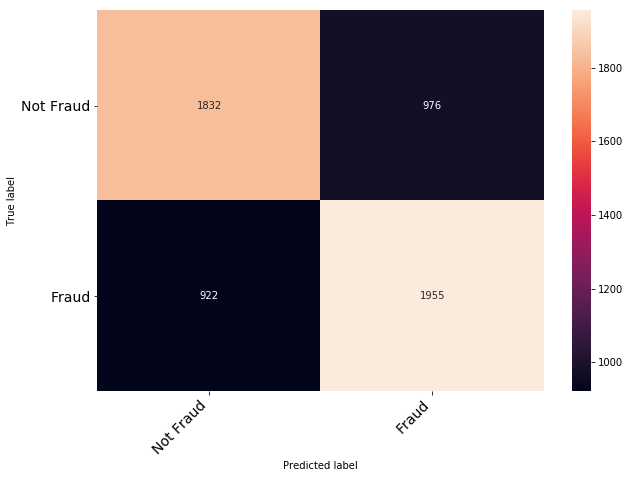

In [41]:
plot_confusion_matrix(confusion_mat, ['Not Fraud', 'Fraud']);

In [42]:
# Get the classification report 
print(classification_report_imbalanced(y_true=y_test_df, y_pred=y_pred, target_names=['Not Fraud', 'Fraud']))

                   pre       rec       spe        f1       geo       iba       sup

  Not Fraud       0.67      0.65      0.68      0.66      0.67      0.44      2808
      Fraud       0.67      0.68      0.65      0.67      0.67      0.44      2877

avg / total       0.67      0.67      0.67      0.67      0.67      0.44      5685

